Kendra Robbins

OSM Week 6 

Newton's Method Lab



In [73]:
import numpy as np
from autograd import grad
from scipy import optimize as opt
from matplotlib import pyplot as plt
from scipy import linalg as la

## Problem 1

In [2]:
def newton(f, fprime, x0, tol=1e-5, maxiters=15):
    
    xk=x0
    convergence = False 
    
    for i in range(maxiters):
        x_kp1 = xk - f(xk)/fprime(xk)
        
        dist = np.abs(x_kp1-xk)
        if dist<tol:
            break
            convergence=True
        xk=x_kp1
        
    return x_kp1
        

In [3]:
f= lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)

In [4]:
fprime(2.)

7.38905609893065

In [5]:
newton(f,fprime, 1)

0.6931471805600254

In [6]:
f(newton(f,fprime, 1))

1.603162047558726e-13

In [7]:
opt.newton(f,1,fprime)

0.6931471805599453

## Problem 2

In [8]:
def findr(N1,N2,P1,P2):
    
    f = lambda r: P1*((1+r)**N1-1)-P2*(1-(1+r)**(-N2))
    
    fprime = lambda r: P1*N1*(1+r)**(N1-1) - P2*N2*(1+r)**(-N2-1)
    
    zero = newton(f,fprime,.05)
    
    return zero

In [9]:
findr(30,20,2000,8000)

0.03877843204799235

## Problem 3

In [76]:
def newton2(f, fprime,x0, α=1, tol=1e-5, maxiters=15):

    j = 0
    dist = 10
    converged = False
    xk=x0
    while dist >= tol and j < maxiters:
        xkp1 = xk - α * (f(xk) / fprime(xk))
        dist = np.abs(xkp1 - xk)
        xk = xkp1
        j += 1
    if j < maxiters:
        converged = True
        
    return xkp1, converged, j

In [77]:
g = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
gprime = lambda x: (1./3)*np.power(np.abs(x), -2./3)

In [78]:
newton2(g,gprime,.01)

(-327.6800000000003, False, 15)

In [79]:
newton2(g,gprime,.01,.4)

(6.400000000000134e-07, True, 6)

## Problem 4

In [71]:
def newton3(f, fprime,n, x0, tol=1e-12, maxiters=15):
    
    #n is the number of different values of α 
    
    α_grid = np.linspace(.01,1.0001,n)
    convergence = False
    iters_vec = np.empty(n)
    
    for j in range(len(α_grid)):
        
        α=α_grid[j]
        iters_vec[j] = newton2(f,fprime,x0,α,tol,maxiters)[2]

    plt.plot(α_grid, iters_vec)
    plt.xlabel("α")
    plt.ylabel("iterations")
    
    α_min = α_grid[np.argwhere(iters_vec == np.min(iters_vec))][0][0]
    return α_min 

0.3330956956956957

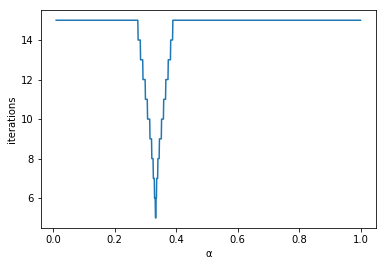

In [80]:
newton3(g,gprime,1000,.01)

## Problem 5

In [82]:
def newton5(f, Df,x0, α=1, tol=1e-5, maxiters=15):

    j = 0
    dist = 10
    converged = False
    xk=x0
    
    if np.isscalar(x0):
        while dist >= tol and j < maxiters:
            xkp1 = xk - α * (f(xk) / Df(xk))
            dist = np.abs(xkp1 - xk)
            xk = xkp1
            j += 1
        if j < maxiters:
            converged = True
        
        return xkp1, converged, j
    
    else:
        while dist >= tol and j < maxiters:
            y = la.solve(Df(xk), f(xk))
            xkp1 = xk - α*y
            dist = la.norm(xkp1-xk,np.inf)
            xk=xkp1
            j=+1
        if j < maxiters:
            converged = True         
            
    return xkp1, converged, j

In [83]:
newton5(f,fprime,1)

(0.6931471805600254, True, 4)

In [84]:
newton5(g,gprime,.01,.4)

(6.400000000000134e-07, True, 6)

## Problem 6

In [87]:
def bio():
    
    γ, δ = 5, 1
    
    # function and jacobian
    def f(vec): 
        x, y = vec
        return np.array([γ * x * y - x * (1 + y), - x * y + (δ - y) * (1 + y)])
    def Df(vec): 
        x, y = vec
        return np.array([[γ * y - (1 + y), γ * x - x], [-y, -x + (δ - y - (1 + y))]])
    
    xgrid = np.linspace(-0.25, 0, 100)
    ygrid = np.linspace(0, 0.25, 100)    
    
    # solutions and αs
    result1 = np.array([3.75, 0.25])
    result2 = np.array([0, 1])
    α1 = 0.55
    α2 = 1
    
    for x in xgrid:
        for y in ygrid:
            start = np.array([x, y])
            
            xvec1, converged1 = newton5(f, Df, start, α1, maxiters=50)[:-1]
            xvec2, converged2 = newton5(f, Df,start, α2, maxiters=50)[:-1]
            
            # check 4 conditions: algorthim converges for each call and solution vectors
            # are approximately equal to expected results
            if converged1 and converged2 and np.allclose(np.abs(xvec1), \
                            np.abs(result1)) and np.allclose(np.abs(xvec2), np.abs(result2)):
                return np.array([x, y])
    
    
    

In [88]:
bio()

array([-0.25     ,  0.1969697])

## Problem 7

In [93]:
f_7_1 = lambda x: x**3 -1
f_7_1_prime = lambda x: 3*x**2
f_7_1_zeros = np.array([1.0, -0.5 + 1j*(3**0.5)/2, -0.5 - 1j*(3**0.5)/2])

In [94]:
def p_7(f, f_prime, zeros, res = 200, iters = 100, bounds = [-1.5, 1.5, -1.5, 1.5]):
    x_real = np.linspace(bounds[0], bounds[1], res) #real
    x_imag = np.linspace(bounds[2], bounds[3], res) #imaginary
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag #combine into complex numbers
    
    #Newton iteration, gives grid X_k
    it = 0
    X_k = X_0
    while it < iters:
        X_kp1 = X_k - f(X_k)/f_prime(X_k)
        X_k = X_kp1
        it += 1
    
    Y = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            Y[i, j] = np.argmin(np.abs(zeros - X_k[i, j]))
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(X_real, X_imag, Y, cmap='brg')
    plt.show()
    return

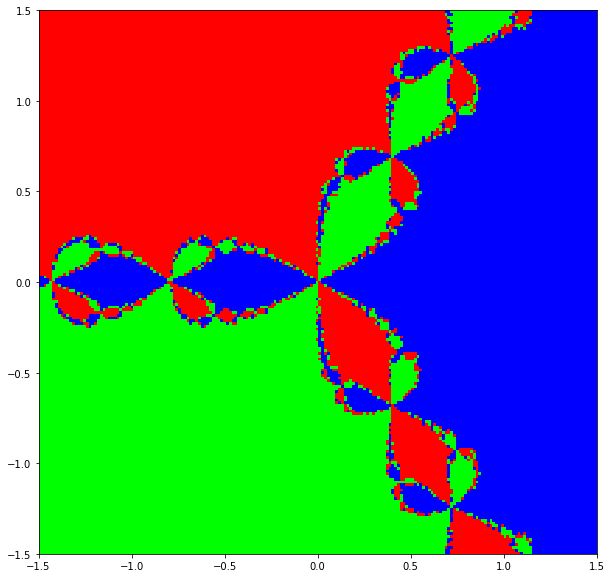

In [95]:
p_7(f_7_1, f_7_1_prime, f_7_1_zeros)